# <center> <u>ForestFires NN Solutions</u>

### Importing the Libraries and Reading the dataset: 

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [27]:
forestfires = pd.read_csv('/content/forestfires.csv')
forestfires.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


### EDA

In [65]:
print("Statistical Description:", forestfires.describe())

Statistical Description:              FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653   

In [66]:
print("Shape:", forestfires.shape)

Shape: (517, 29)


In [67]:
print("Data Types:", forestfires.dtypes)

Data Types: FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object


### Data Visualization: 

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 10 Patch objects>)

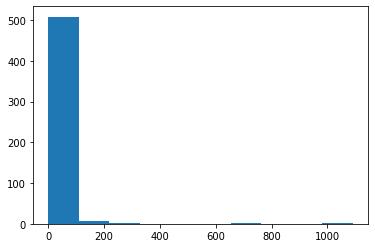

In [69]:
import matplotlib.pyplot as plt
plt.hist((forestfires.area))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ecdb82a90>,
      dtype=object)

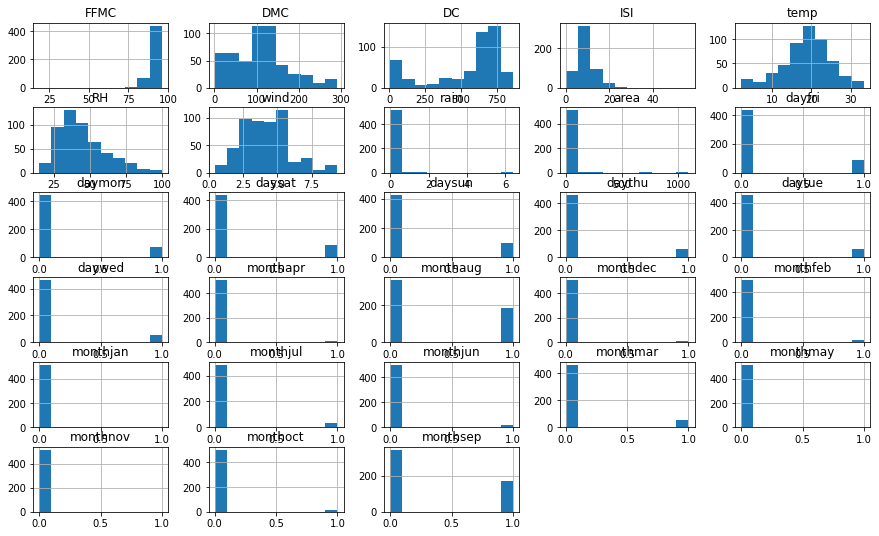

In [73]:
forestfires.hist(figsize = (15,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ec07713d0>,
      dtype=object)

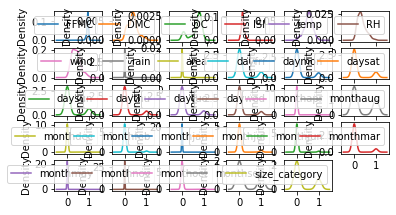

In [90]:
forestfires.plot(kind='density', subplots=True, layout=(6,6), sharex=False, sharey=False, )

FFMC                AxesSubplot(0.125,0.808774;0.168478x0.0712264)
DMC              AxesSubplot(0.327174,0.808774;0.168478x0.0712264)
DC               AxesSubplot(0.529348,0.808774;0.168478x0.0712264)
ISI              AxesSubplot(0.731522,0.808774;0.168478x0.0712264)
temp                AxesSubplot(0.125,0.723302;0.168478x0.0712264)
RH               AxesSubplot(0.327174,0.723302;0.168478x0.0712264)
wind             AxesSubplot(0.529348,0.723302;0.168478x0.0712264)
rain             AxesSubplot(0.731522,0.723302;0.168478x0.0712264)
area                 AxesSubplot(0.125,0.63783;0.168478x0.0712264)
dayfri            AxesSubplot(0.327174,0.63783;0.168478x0.0712264)
daymon            AxesSubplot(0.529348,0.63783;0.168478x0.0712264)
daysat            AxesSubplot(0.731522,0.63783;0.168478x0.0712264)
daysun              AxesSubplot(0.125,0.552358;0.168478x0.0712264)
daythu           AxesSubplot(0.327174,0.552358;0.168478x0.0712264)
daytue           AxesSubplot(0.529348,0.552358;0.168478x0.0712

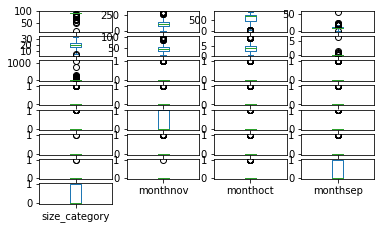

In [87]:
forestfires.plot(kind='box', subplots=True, layout=(9,4), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ebfc09e50>,
      dtype=object)

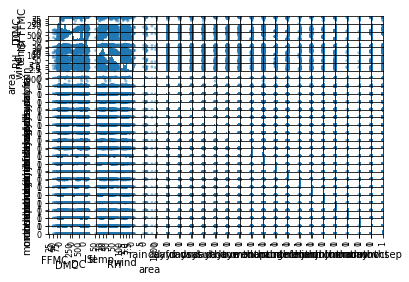

In [92]:
pd.plotting.scatter_matrix(forestfires)

[Text(0, 0, 'FFMC'),
 Text(0, 0, 'DMC'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'ISI'),
 Text(0, 0, 'temp'),
 Text(0, 0, 'RH'),
 Text(0, 0, 'wind'),
 Text(0, 0, 'rain'),
 Text(0, 0, 'area'),
 Text(0, 0, 'dayfri'),
 Text(0, 0, 'daymon'),
 Text(0, 0, 'daysat'),
 Text(0, 0, 'daysun')]

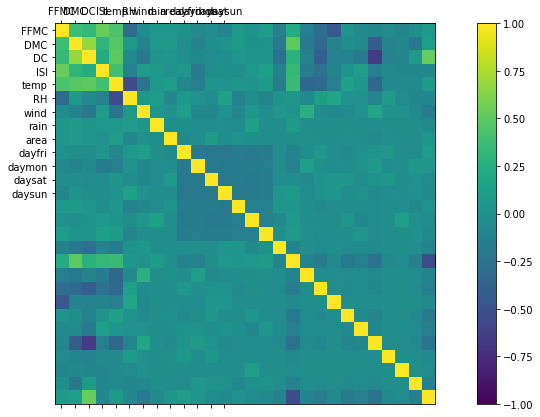

In [94]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111)
cax = ax.matshow(forestfires.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(forestfires.columns)
ax.set_yticklabels(forestfires.columns)

In [28]:
#As dummy variables are already created, we will remove the month and alsoday columns
forestfires.drop(["month","day"],axis=1,inplace = True)

In [29]:
# correlation
forestfires["size_category"].value_counts()
forestfires.isnull().sum()
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
##I am taking small as 0 and large as 1
forestfires.loc[forestfires["size_category"]=='small','size_category']=0
forestfires.loc[forestfires["size_category"]=='large','size_category']=1
forestfires["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [31]:
# normalization
def norm_func(i):
     x = (i-i.min())	/	(i.max()	-	i.min())
     return (x)

In [38]:
predictors = forestfires.iloc[:,0:28]
target = forestfires.iloc[:,28]
print(target)

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: object


In [44]:
predictors1 = norm_func(predictors)
features = predictors1.columns

In [35]:
features = forestfires.columns

In [36]:
type(features)

pandas.core.indexes.base.Index

In [37]:
features

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(predictors1,target, test_size=0.3,stratify = target)

In [46]:
x_train=np.asarray(x_train).astype(np.int)

y_train=np.asarray(y_train).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

### Model Building:

In [47]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model  

In [20]:
type(x_train)

pandas.core.frame.DataFrame

In [21]:
x_train = x_train.to_numpy()

In [22]:
y_train = y_train.to_numpy()

In [25]:
y_train = pd.DataFrame(y_train)

In [48]:
first_model = prep_model([28,50,40,20,1])
first_model.fit(np.array(x_train), np.array(y_train) ,epochs=500)
pred_train = first_model.predict(np.array(x_train))

Epoch 1/500
12/12 [==============================] - 1s 2ms/step - loss: 0.6743 - accuracy: 0.7285
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7313
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.7313
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5876 - accuracy: 0.7313
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5793 - accuracy: 0.7313
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5775 - accuracy: 0.7313
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.7313
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.7313
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7313
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.7313
Epoch 11/

In [49]:
#Converting the predicted values to series 
pred_train = pd.Series([i[0] for i in pred_train])

In [50]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"

In [52]:
type(x_train)

numpy.ndarray

In [55]:
x_train = pd.DataFrame(x_train, columns = features)

In [60]:
y_train = pd.DataFrame(y_train , columns = ['size_category'])

In [61]:
train = pd.concat([x_train,y_train],axis=1)
train["size_category"].value_counts()

Series([], Name: size_category, dtype: int64)

In [62]:
#For training data
from sklearn.metrics import confusion_matrix
train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()
confusion_matrix(pred_train_class,train["original_class"])
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True))
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))

original_class,small
row_0,
large,30
small,331


In [95]:
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True))

0.9168975069252078

In [63]:
#For test data
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"
test =pd.concat([x_test,y_test],axis=1)
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"

In [64]:
test["original_class"].value_counts()
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True)) # 85%
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
small,42,114


In [96]:
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True)) #73%

0.7307692307692307